In [2]:
import healpy as hp
import numpy as np
import matplotlib as mpl
import matplotlib.image
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import colors
from matplotlib import lines
from matplotlib.image import NonUniformImage
import astropy.io
from astropy.io import fits
from astropy import units as u
from astropy.units import cds

In [181]:
# plots peak frequency mean
#v = hp.read_map('COM_CompMap_AME-commander_0256_R2.00.fits', field=4)
#hp.mollview(p, unit = 'GHz', title = 'Primary peak frequency posterior mean', min=17, max = 23, cmap = 'inferno')

# plots mean amplitude @ 22.8 GHz
#m = hp.read_map('COM_CompMap_AME-commander_0256_R2.00.fits', field=1, hdu=1) #reads mean amplitude map
#m_K = ((2*(v**2)*(1.381e-23)*m)/((3e+8)**2))*u.J/((u.m)**2*u.sr) # sets units
#m_J = (m_K).to(cds.MJy/cds.sr) #converts to MJy/sr
#I = m_J * cds.sr/cds.MJy
#hp.mollview(m_J, unit='MJy sr^-1 @ 22.8 GHz', title = 'Primary amplitude posterior mean', min=1e-16, max=3e-14, norm='log', cmap = 'pink')

#idx = np.random.choice(np.arange(len(v)), 500000, replace=False) #randomly selects 1000 values from 1 to n, where n is number of possible values in v
#v_c = v[idx] #makes an array of the entries of p corresponding to these values
#I_c = I[idx] #does the same for I

#a = plt.scatter(v_c, I_c)
#plt.ylim(8e-18, 3e-13)
#plt.xlim(9, 31)
#plt.yscale('log')
#plt.xscale('log')
#plt.xlabel('Frequency (GHz)')
#plt.ylabel('Specific Intensity (MJy/sr)')

In [3]:
def I(A1, A2, nu_p1, nu_sd, f):
    nu_1 = nu_01*(30./nu_p1) #sets the value nu1 for f_sd1
    nu_2 = nu_02*(30./nu_p2) #same for 2
    
    f_sd1 = np.interp(nu_1, nu_sd, f) #interpolates nu_sd and f to create f_sd1 at nu1
    f_sd2 = np.interp(nu_2, nu_sd, f) #same for 2
    f_nu = np.interp(nu, nu_sd, f) #same for general nu
    
    I_1 = A1*((nu_01/nu)**2)*(f_nu/f_sd1) #component from primary 
    I_2 = A2*((nu_02/nu)**2)*(f_nu/f_sd2) #component from secondary
    m_K = (I_1 + I_2)*u.J/((u.m)**2*u.sr) #sums the components and adds units
    m_J = (m_K).to(cds.MJy/cds.sr) #converts to MJy/sr
    return m_J * cds.sr/cds.MJy #gets rid of units for plotting purposes

/home/mdodici/anaconda3/lib/python3.7/site-packages/healpy/fitsfunc.py:352: UserWarning: If you are not specifying the input dtype and using the default np.float64 dtype of read_map(), please consider that it will change in a future version to None as to keep the same dtype of the input file: please explicitly set the dtype if it is important to you.
  "If you are not specifying the input dtype and using the default "


NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 256
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


Text(0, 0.5, 'Specific Intensity (MJy/sr)')

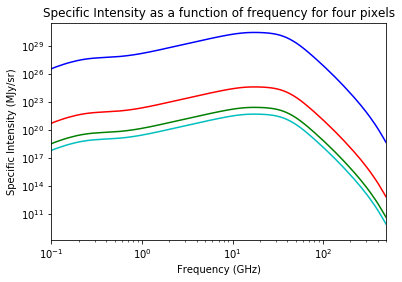

In [33]:
m = hp.read_map('COM_CompMap_AME-commander_0256_R2.00.fits', field=1, hdu=1) #reads mean amplitude primary map
n = hp.read_map('COM_CompMap_AME-commander_0256_R2.00.fits', field=1, hdu=2) #same secondary map
hdu = fits.open("COM_CompMap_AME-commander_0256_R2.00.fits")
data = hdu[3].data
nu_sd = np.array([i[0] for i in data])
f = np.array([i[1] for i in data])

nu_p2 = 33.35 #sets frequency peak for all secondary pixels
nu_01 = 22.8 #sets reference freq for primary pixels
nu_02 = 41.0 #sets reference freq for secondary pixels

nu = np.linspace(.1, 1000, len(m)) #creates a range of values nu
pix = np.random.choice(range(1000), 4) #randomly selects a pixel

for i in range(4):
    a1_i = m[pix[i]] #sets A1 for the ith random pixel
    a2_i = n[pix[i]] #sets A2 for the ith random pixel
    nup1_i = nu_sd[pix[i]] #sets nu_p1 for the ith random pixel
    
    I_nui = I(a1_i, a2_i, nup1_i, nu_sd, f) #sets I_nu(nu) for the ith random pixel
    
    color = ['b', 'r', 'g', 'c'] #creates an array of four different color possibilities
    plt.plot(nu, I_nui, color[i]) #plots I_nu(nu) for each pixel, each in a different color

plt.xlim(.1, 500)
plt.yscale('log')
plt.xscale('log')
plt.title('Specific Intensity as a function of frequency for four pixels')
plt.xlabel('Frequency (GHz)')
plt.ylabel('Specific Intensity (MJy/sr)')

Text(0, 0.5, 'Template Frequency')

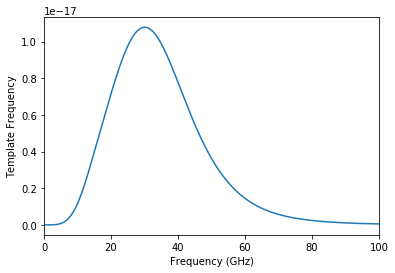

In [162]:
hdu = fits.open("COM_CompMap_AME-commander_0256_R2.00.fits")
data = hdu[3].data
p = np.array([i[0] for i in data])
f = np.array([i[1] for i in data])

plt.plot(p,f)
plt.xlabel('Frequency (GHz)')
plt.xlim(0,100)
plt.ylabel('Template Frequency')